# 02 LiDAR Challenge

Light Detection And Ranging is a method of determining distance using pulses of light (or in the case of some systems called FMCW liDARs by a continuous beam which is swept in frequency). For example a sattelite or aeroplane based LiDAR scanner may send out targeted pulse of light onto a patch of ground and detect the reflections.

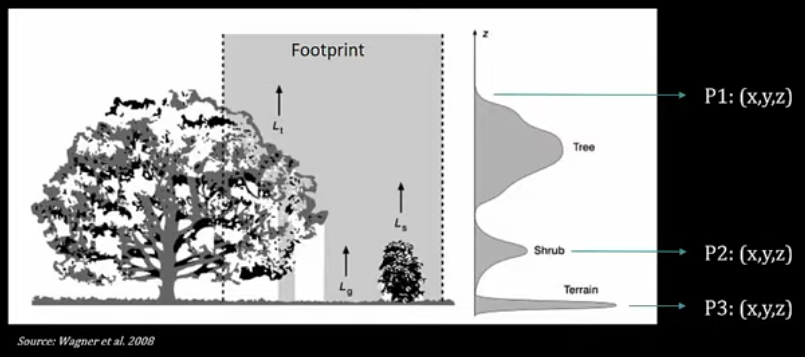

In the real world the beam will reflect off many different things, For instance off the canopy and off the ground and so we will get a lot of different reflections in our return. You can find more information about LiDAR here:

https://www.youtube.com/watch?v=q7qZmODh6lI

https://www.youtube.com/watch?v=tk9mJLNpU_k

Your challenge today will be to determine canopy height based off some hypothetical LiDAR Data. Canopy height is just one of many factors that we can factor into a fire behaviour model. Please ignore the following code and skip to the next markdown cell.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

mountain_x = np.zeros((1,100))
mountain_x_profile_1 = np.array([sp.signal.windows.gaussian(51,std=6)])*40
mountain_x_profile_2 = np.array([sp.signal.windows.gaussian(15,std=3)])*20
mountain_x[0,0:51] = mountain_x_profile_1
mountain_x[0,70:85] = mountain_x_profile_2
mountain_y = np.array([sp.signal.windows.gaussian(35,std=6)])
mountain = np.outer(mountain_x,mountain_y)
canopy_x = np.array([sp.signal.windows.gaussian(100,std=30)])*20
canopy_y = np.array([sp.signal.windows.gaussian(35,std=8)])
canopy = np.outer(canopy_x,canopy_y)
last_return_heights = mountain
first_return_heights = mountain+canopy
altitude = 400e3
c = 3e8
surface_return_time = 2*altitude/c
last_return_times = surface_return_time*np.ones((100,35)) - 2*last_return_heights/c
first_return_times = surface_return_time*np.ones((100,35)) - 2*first_return_heights/c
LiDAR_data = np.zeros((100,35,2))
LiDAR_data[:,:,0] = first_return_times
LiDAR_data[:,:,1] = last_return_times

A LiDAR scanner is mounted on a satellite in Low earth orbit at 400km altitude. It has taken measurements of a forrested 1000mx350m section of the earth's surface dividing it into 10mx10m squares. It has returned an array stored in the variable LiDAR_data which is 100x35x2 in size. The first 100x35 channel is the time in seconds that it took to recieve the first return from each square of ground. The second 100x35 channel is the time in seconds that it took to recieve the last return from that square of ground. Noting that the speed of light is $c=3\times 10^8\,m/s$ work out the following:

- What is the maximum canopy height of the forest in metres? (Hint np.max())

- What geographical features do you think the forest sits between? (Hint: Use plt.imshow())

In [2]:
print(LiDAR_data) # YOUR CODE HERE!!!!

[[[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]

 [[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]

 [[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]

 ...

 [[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]

 [[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]

 [[0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  ...
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]
  [0.00266666 0.00266667]]]
